In [1]:
import pandas as pd

# Load the provided World Bank data files
file_path_population = 'population data/API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv'
file_path_country_metadata = 'population data/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv'
file_path_indicator_metadata = 'population data/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv'

# Reading the files
population_data = pd.read_csv(file_path_population, skiprows=4)
country_metadata = pd.read_csv(file_path_country_metadata)
indicator_metadata = pd.read_csv(file_path_indicator_metadata)

# Displaying the first few rows of the data to understand its structure
population_data.head(), country_metadata.head(), indicator_metadata.head()


(                  Country Name Country Code     Indicator Name Indicator Code  \
 0                        Aruba          ABW  Population, total    SP.POP.TOTL   
 1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
 2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
 3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
 4                       Angola          AGO  Population, total    SP.POP.TOTL   
 
           1960         1961         1962         1963         1964  \
 0      54608.0      55811.0      56682.0      57475.0      58178.0   
 1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
 2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
 3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
 4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   
 
           1965  ...         2014         2015         2016         2017  \
 0

c:\Users\sumsa\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sumsa\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


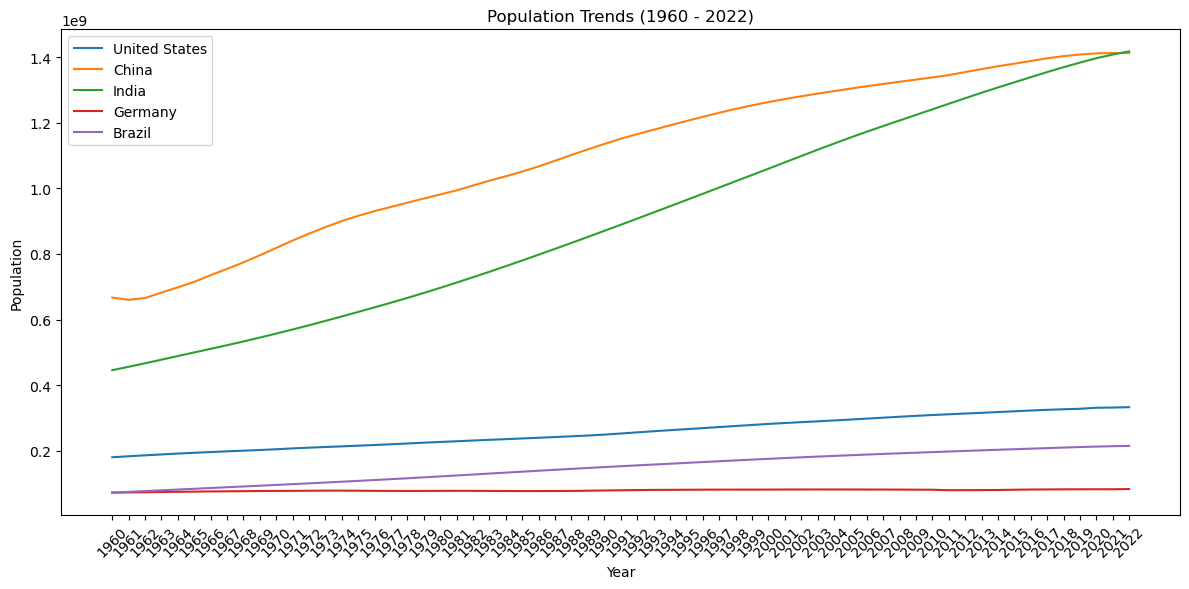

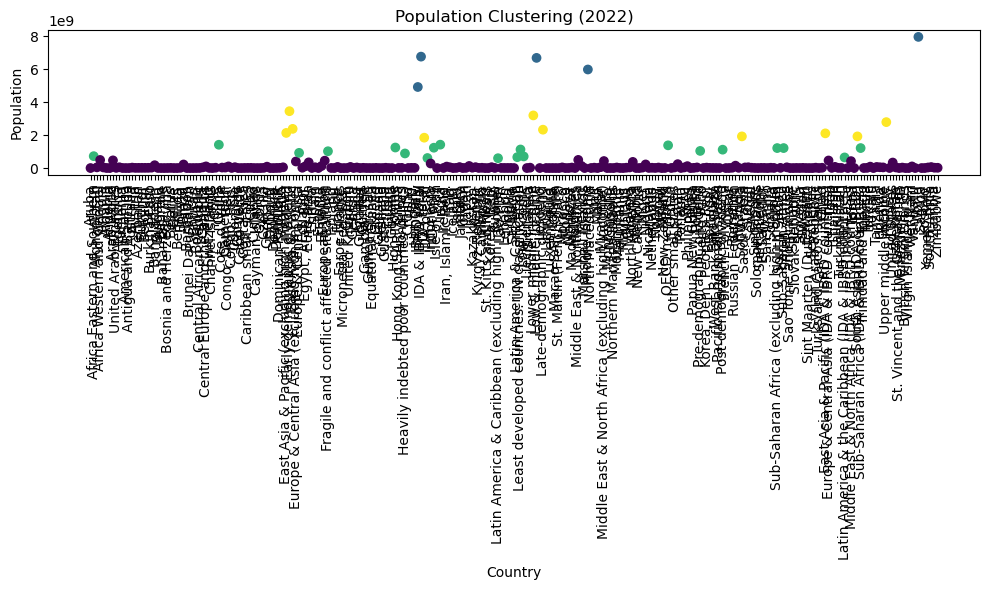

c:\Users\sumsa\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


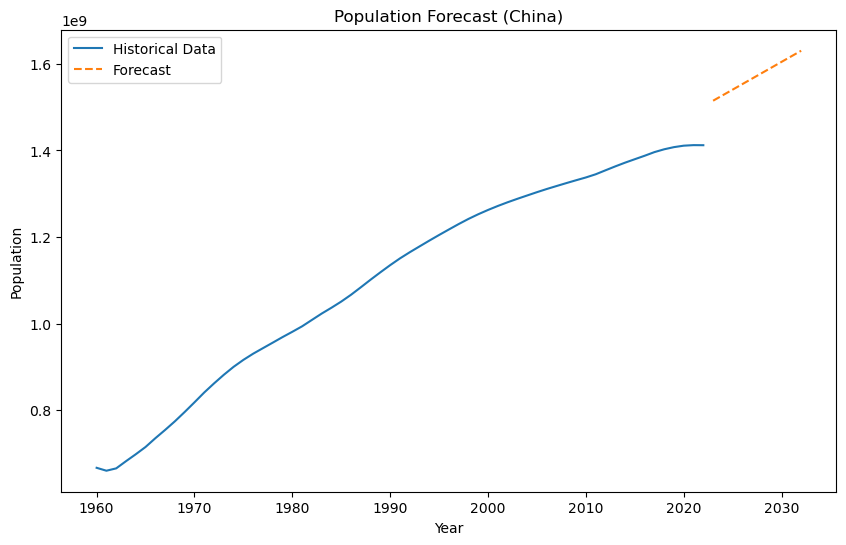

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.linear_model import LinearRegression

# Selecting a few countries for initial trend visualization
selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
population_trends = population_data[population_data['Country Name'].isin(selected_countries)]

# Melting the dataframe for easier plotting
population_melted = population_trends.melt(id_vars=['Country Name'], value_vars=population_trends.columns[4:-1], 
                                           var_name='Year', value_name='Population')

# Plotting population trends
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = population_melted[population_melted['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Population'], label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends (1960 - 2022)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Prepare data for K-means clustering
# Using latest population data for clustering
latest_year = population_data.columns[-2]  # Second last column is the latest year
clustering_data = population_data[['Country Name', latest_year]].dropna()
clustering_data = clustering_data.rename(columns={latest_year: 'Population'})

# Applying K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data[['Population']])

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['Country Name'], clustering_data['Population'], c=clustering_data['Cluster'])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Population Clustering (2022)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# Preparing data for linear regression forecast
# For simplicity, forecasting for one country - let's choose China
forecast_country = 'China'
forecast_data = population_data[population_data['Country Name'] == forecast_country].iloc[:, 4:-1].T
forecast_data = forecast_data.reset_index()
forecast_data.columns = ['Year', 'Population']
forecast_data = forecast_data.dropna()
forecast_data['Year'] = forecast_data['Year'].astype(int)

# Applying linear regression
model = LinearRegression()
model.fit(forecast_data[['Year']], forecast_data['Population'])

# Predicting for the next 10 years
future_years = np.array(range(2023, 2033)).reshape(-1, 1)
predictions = model.predict(future_years)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_data['Year'], forecast_data['Population'], label='Historical Data')
plt.plot(future_years, predictions, label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecast (China)')
plt.legend()

plt.show()

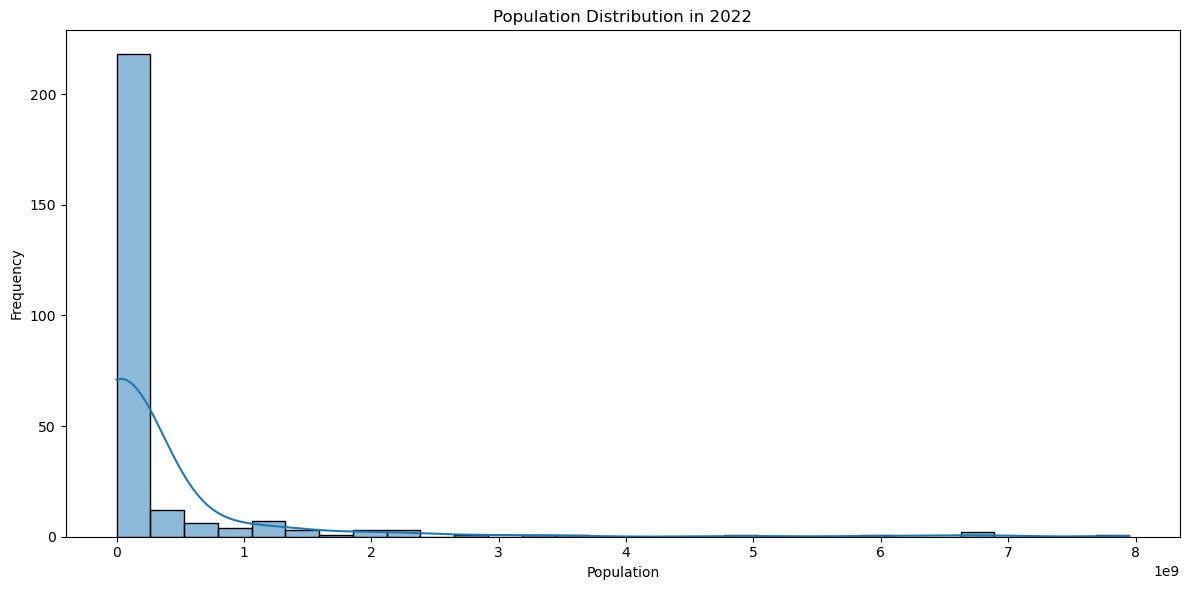

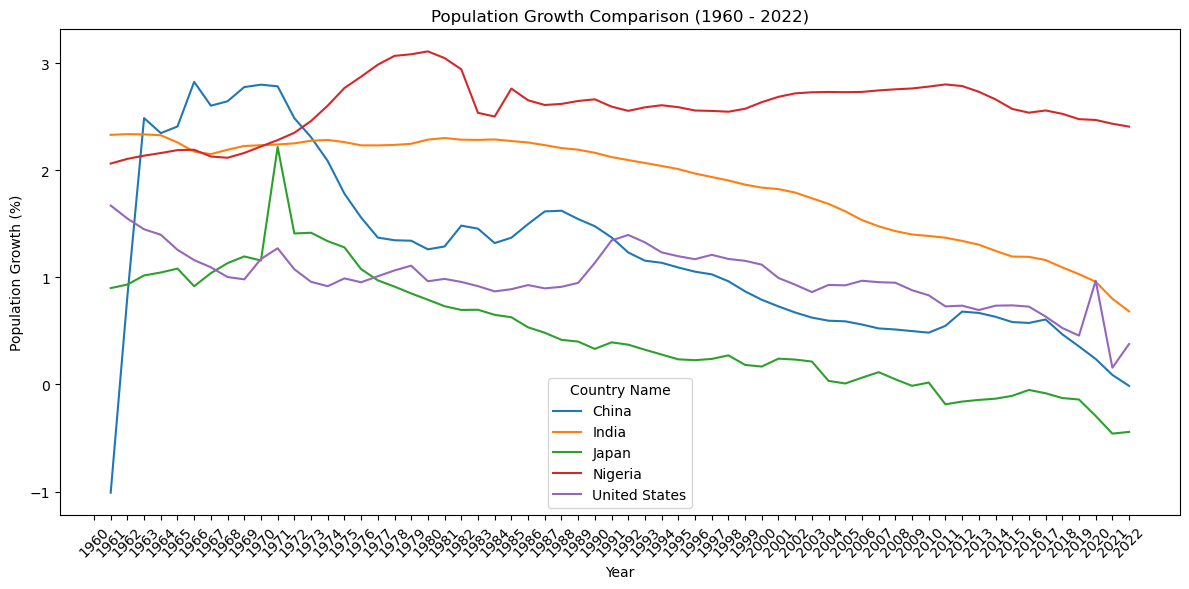

In [4]:
import seaborn as sns

# Visualizing population distribution in 2022
plt.figure(figsize=(12, 6))
sns.histplot(clustering_data['Population'], bins=30, kde=True)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Distribution in 2022')
plt.tight_layout()

# Population growth comparison: Selecting a few countries for a more detailed comparison
comparison_countries = ['United States', 'China', 'India', 'Nigeria', 'Japan']
comparison_data = population_data[population_data['Country Name'].isin(comparison_countries)]

# Calculating percentage change in population for these countries from 1960 to 2022
comparison_data = comparison_data.set_index('Country Name').iloc[:, 3:-1].pct_change(axis=1) * 100
comparison_data = comparison_data.reset_index()
comparison_data_melted = comparison_data.melt(id_vars=['Country Name'], value_vars=comparison_data.columns[1:], 
                                              var_name='Year', value_name='Population Growth (%)')

# Plotting population growth comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_data_melted, x='Year', y='Population Growth (%)', hue='Country Name')
plt.xlabel('Year')
plt.ylabel('Population Growth (%)')
plt.title('Population Growth Comparison (1960 - 2022)')
plt.xticks(rotation=45)
plt.tight_layout()
